# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_id_list = []
city_name_list = []
lng_list = []
lat_list = []
temp_list = []
humidity_list = []
clouds_list = []
wind_speed_list = []

for city in cities:
    response_json = requests.get(query_url + city).json()
    
    try:
        city_id = response_json['id']
        city_id_list.append(city_id)
        
        city_name = response_json['name']
        city_name_list.append(city_name)

        lng = response_json['coord']['lon']
        lng_list.append(lng)

        lat = response_json['coord']['lat']
        lat_list.append(lat)

        temp = response_json['main']['temp']
        temp_list.append(temp)

        humidity = response_json['main']['humidity']
        humidity_list.append(humidity)

        clouds = response_json['clouds']['all']
        clouds_list.append(clouds)

        wind_speed = response_json['wind']['speed']
        wind_speed_list.append(wind_speed)
    
        print(f"City Name: {city}, City ID: {city_id}")
        
    except:
        print("That record does not exist, searching for next record...")


City Name: naryan-mar, City ID: 523392
City Name: baghmara, City ID: 1274553
City Name: bredasdorp, City ID: 1015776
City Name: korla, City ID: 1529376
City Name: zhigansk, City ID: 2012530
City Name: chokurdakh, City ID: 2126123
City Name: bluff, City ID: 2206939
City Name: klaksvik, City ID: 2618795
City Name: khasan, City ID: 2039557
City Name: eskisehir, City ID: 315202
City Name: port-gentil, City ID: 2396518
City Name: kodiak, City ID: 5866583
City Name: leningradskiy, City ID: 2123814
City Name: paamiut, City ID: 3421193
City Name: hilo, City ID: 5855927
City Name: sosnovo-ozerskoye, City ID: 2016216
City Name: kodar, City ID: 1266416
City Name: den helder, City ID: 2757220
City Name: surt, City ID: 2210554
City Name: rikitea, City ID: 4030556
City Name: mataura, City ID: 6201424
City Name: clarence town, City ID: 2171465
City Name: kotaparh, City ID: 1266029
That record does not exist, searching for next record...
That record does not exist, searching for next record...
City Na

That record does not exist, searching for next record...
City Name: sabang, City ID: 1214026
City Name: zorya, City ID: 687602
City Name: saint-paul, City ID: 935221
City Name: pangnirtung, City ID: 6096551
City Name: kapenguria, City ID: 199604
City Name: ixtapa, City ID: 4004293
That record does not exist, searching for next record...
City Name: ous, City ID: 1495812
That record does not exist, searching for next record...
City Name: abilene, City ID: 4669635
City Name: mecca, City ID: 104515
City Name: chicama, City ID: 3698359
City Name: laurel, City ID: 4360369
City Name: palmer, City ID: 4946620
City Name: gaogou, City ID: 1810553
City Name: lyubim, City ID: 532600
City Name: krasnyy chikoy, City ID: 2012349
City Name: kahului, City ID: 5847411
City Name: marshall, City ID: 4074736
City Name: west plains, City ID: 4414200
City Name: hirado, City ID: 1862555
City Name: lasa, City ID: 3175096
City Name: cooma, City ID: 2170577
City Name: sogne, City ID: 3137971
City Name: sur, City

City Name: oktyabrskiy, City ID: 515879
City Name: saint-augustin, City ID: 6137462
City Name: san patricio, City ID: 3985168
City Name: ancud, City ID: 3899695
City Name: muisne, City ID: 3653967
City Name: kapit, City ID: 1737185
City Name: ushirombo, City ID: 149129
City Name: amahai, City ID: 1651591
City Name: kalininsk, City ID: 554199
City Name: kalabo, City ID: 915471
City Name: suratgarh, City ID: 1255361
City Name: madang, City ID: 2091996
City Name: tuatapere, City ID: 2180815
City Name: vanino, City ID: 2119932
City Name: petropavlovskoye, City ID: 1495101
City Name: guarenas, City ID: 3640049
City Name: beni mazar, City ID: 359212
City Name: ergani, City ID: 315468
City Name: puerto madryn, City ID: 3840092
City Name: iwanai, City ID: 2129868
City Name: vestmannaeyjar, City ID: 3412093
City Name: ngama, City ID: 2427036
City Name: sakaiminato, City ID: 1853174
City Name: zemio, City ID: 235826
City Name: beisfjord, City ID: 3144987
City Name: pingliang, City ID: 1798760
Ci

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
cities_df = pd.DataFrame({"City": city_name_list, "City ID": city_id_list, "Lat": lat_list, "Lng": lng_list,
                         "Temperature": temp_list, "Humidity": humidity_list, "Clouds": clouds_list,
                         "Wind Speed": wind_speed_list})
cities_df.head()

,City,City ID,Lat,Lng,Temperature,Humidity,Clouds,Wind Speed
0,Naryan-Mar,523392,67.67,53.09,30.22,98,100,12.24
1,Baghmara,1274553,23.80,86.21,91.58,18,4,2.28
2,Bredasdorp,1015776,-34.53,20.04,48.20,87,2,4.70
3,Korla,1529376,41.76,86.15,68.16,15,0,4.65
4,Zhigansk,2012530,66.77,123.37,32.94,95,100,12.82


In [5]:
cities_df.to_csv("Output/city_weather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

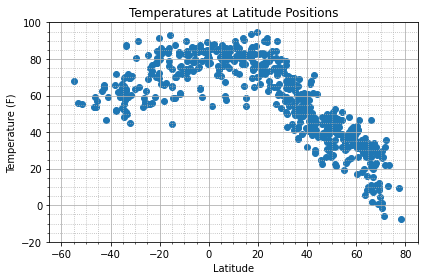

<Figure size 432x288 with 0 Axes>

In [31]:
x_values = cities_df["Lat"]
y_values = cities_df["Temperature"]

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-20, 100)
plt.xlim(-65, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_temp.png")

#### Latitude vs. Humidity Plot

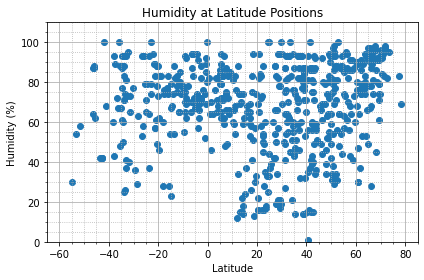

<Figure size 432x288 with 0 Axes>

In [32]:
x_values = cities_df["Lat"]
y_values = cities_df["Humidity"]

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 110)
plt.xlim(-65, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_humid.png")

#### Latitude vs. Cloudiness Plot

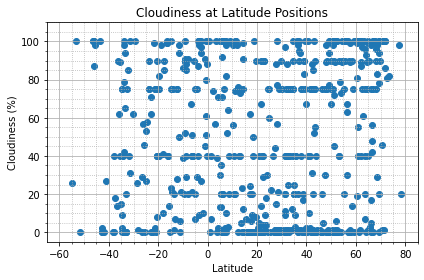

<Figure size 432x288 with 0 Axes>

In [33]:
x_values = cities_df["Lat"]
y_values = cities_df["Clouds"]

plt.scatter(x_values,y_values)
plt.title('Cloudiness at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.ylim(-5, 110)
plt.xlim(-65, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_clouds.png")

#### Latitude vs. Wind Speed Plot

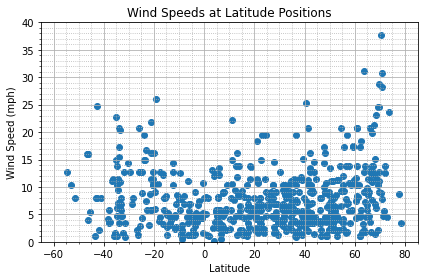

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = cities_df["Lat"]
y_values = cities_df["Wind Speed"]

plt.scatter(x_values,y_values)
plt.title('Wind Speeds at Latitude Positions')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.ylim(0, 40)
plt.xlim(-65, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/lat_wind.png")

## Linear Regression

In [59]:
# OPTIONAL: Create a function to create Linear Regression plots
# def linear_regression(x_values, y_values):
#     (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
#     regress_values = x_values * slope + intercept
#     line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#     correlation = st.pearsonr(x_values, y_values)
    
#     print(f"r-squared: {rvalue**2}")
#     print(f"Correlation: {correlation}")
#     print(f"Line: {line_eq}")

#     return regress_values, line_eq



r-squared: 0.46328733221744484
Correlation: (-0.6806521374516096, 1.499295948718456e-80)
Line: y = -0.46x + 68.38


(0      37.190299
 1      57.410567
 2      84.295643
 3      49.132564
 4      37.605121
          ...    
 578    83.244760
 579    60.268230
 580    48.634777
 581    65.462723
 582    41.739513
 Name: Lat, Length: 583, dtype: float64,
 'y = -0.46x + 68.38')

In [57]:
# Create Northern and Southern Hemisphere DataFrames
mask = cities_df['Lat'] > 0
northern_hemisphere = cities_df[mask]
southern_hemisphere = cities_df[~mask]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

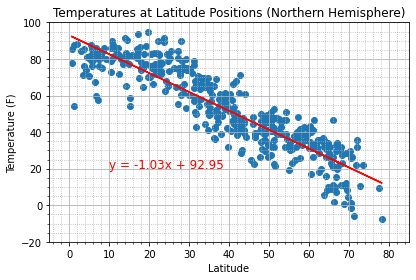

<Figure size 432x288 with 0 Axes>

In [68]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(-20, 100)
plt.xlim(-5, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/nh_lat_temp_regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

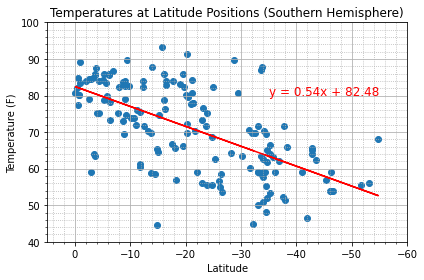

<Figure size 432x288 with 0 Axes>

In [83]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Temperature"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.ylim(40, 100)
plt.xlim(5, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/sh_lat_temp_regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

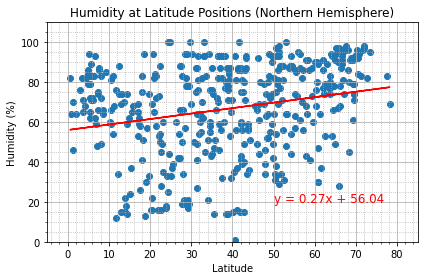

<Figure size 432x288 with 0 Axes>

In [85]:
x_values = northern_hemisphere["Lat"]
y_values = northern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(0, 110)
plt.xlim(-5, 85)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.show()
plt.savefig("Output/nh_lat_humid_regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

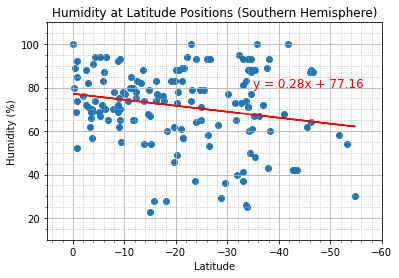

<Figure size 432x288 with 0 Axes>

In [94]:
x_values = southern_hemisphere["Lat"]
y_values = southern_hemisphere["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-35,80),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.ylim(10, 110)
plt.xlim(5, -60)
plt.minorticks_on()
plt.grid(which='major', linestyle='-')
plt.grid(which='minor', linestyle=':')
#plt.tight_layout()
plt.show()
plt.savefig("Output/sh_lat_humid_regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression